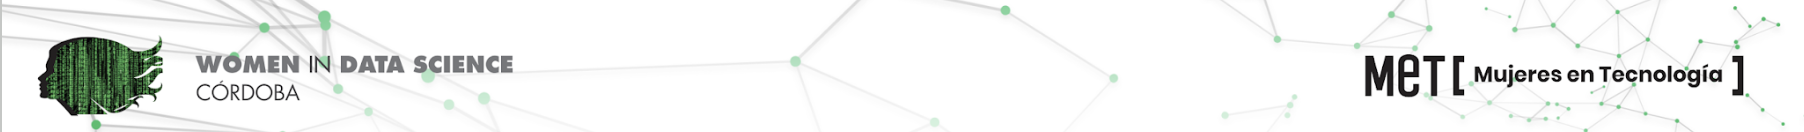

# Modelo Final


-------------------------------

## Librerías

In [ ]:
!pip install shap

In [2]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

#Modelos
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import roc_curve, auc, roc_auc_score, RocCurveDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.2f}'.format
sns.set_style("white")
sns.set_palette("flare")

seed = 42

## 01) Lectura de los datos

In [3]:
%%time
df_test_eda = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS0IbI8WiSzaY-YJnZqQlBvhh7QJ-ynt751CixvxndlMpe0pBNQB0_2xyCkDvV7uh2vEWuqolIj_bQH/pub?gid=731515881&single=true&output=csv')
df_train_eda = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQGoPiS3C4divKxs17LM3mhcG7L-JDXHYcIpX8sNET9wbLctqlS-V4ID0cwVMdEccdt8f6FitC2K0YC/pub?gid=2112906031&single=true&output=csv')
df_train_proc = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSfUNcRvLD7fRUDaMru76eeQ2fELQYvY7XZFhN8BwStMCh6EdlUFdUR31QHTBaVNxJvndM2i0JdNHGc/pub?gid=360615667&single=true&output=csv')
df_test_proc = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTdXFFlsPhb7ZMB_LVUf-LFkfuDpT9ZGYDEAU7SWD9Hg1pzeUuCf_v6u4CSXLihieA0xDhQ32ybfkyD/pub?gid=1667917604&single=true&output=csv')

df_train_proc.head()

CPU times: user 149 ms, sys: 35.1 ms, total: 184 ms
Wall time: 4.65 s


,CustomerID,Dependents,Internet Service_Fiber optic,Monthly Charges,Contract_Two year,Contract_Month-to-month,Online Security_No,Tenure Months,Device Protection_No,Paperless Billing,Payment Method_Electronic check,Internet Service_No,Senior Citizen,Partner,Online Backup_No,Tech Support_No
0,9571-EDEBV,0,1,98.65,0,0,1,71,0,1,0,0,0,1,1,1
1,7562-GSUHK,0,1,93.20,0,1,1,16,0,1,0,0,0,0,0,1
2,2325-WINES,0,1,104.05,0,0,1,32,0,1,0,0,0,0,0,1
3,9381-NDKME,0,0,40.65,0,1,1,24,0,1,0,0,1,1,1,1
4,2164-SOQXL,1,0,20.05,0,1,0,20,0,0,0,1,0,1,0,0


In [4]:
df_train_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CustomerID                       5634 non-null   object 
 1   Dependents                       5634 non-null   int64  
 2   Internet Service_Fiber optic     5634 non-null   int64  
 3   Monthly Charges                  5634 non-null   float64
 4   Contract_Two year                5634 non-null   int64  
 5   Contract_Month-to-month          5634 non-null   int64  
 6   Online Security_No               5634 non-null   int64  
 7   Tenure Months                    5634 non-null   int64  
 8   Device Protection_No             5634 non-null   int64  
 9   Paperless Billing                5634 non-null   int64  
 10  Payment Method_Electronic check  5634 non-null   int64  
 11  Internet Service_No              5634 non-null   int64  
 12  Senior Citizen      

In [5]:
X_train = df_train_proc.copy()
X_train.drop('CustomerID', axis = 1, inplace = True)
Y_train = df_train_eda['Churn Value']

In [6]:
X_test = df_test_proc.copy()
X_test.drop('CustomerID', axis = 1, inplace = True)
Y_test = df_test_eda['Churn Value']

## 02) Modelo Final

In [7]:
xgboost_opt = XGBClassifier(random_state=42,
                            objective = 'binary:logistic',
                            subsample = 0.9,
                            colsample_bytree = 0.5,
                            scale_pos_weight = 3,
                            reg_lambda = 5.0,
                            max_depth = 4,
                            learning_rate = 0.05,
                            gamma = 0.25)


xgboost_opt.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

#### Métricas

In [11]:
preds_xgboost_train = xgboost_opt.predict_proba(X_train)
preds_xgboost_test = xgboost_opt.predict_proba(X_test)

train_roc = round(roc_auc_score(Y_train, preds_xgboost_train[:,1]) ,4)
test_roc = round(roc_auc_score(Y_test, preds_xgboost_test[:,1]) ,4)

print("ROC LGBM Train: " + str(train_roc))
print("ROC LGBM Test: " + str(test_roc))

ROC LGBM Train: 0.8813
ROC LGBM Test: 0.8606


In [14]:
# accuracy: (tp + tn) / (p + n)
accuracy=accuracy_score(Y_test, xgboost_opt.predict(X_test))
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(Y_test, xgboost_opt.predict(X_test))
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_test, xgboost_opt.predict(X_test))
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, xgboost_opt.predict(X_test))
print('F1 score: %f' % f1)

Accuracy: 0.755855
Precision: 0.545016
Recall: 0.847500
F1 score: 0.663405


In [16]:
df_train_score = df_train_eda.copy()
df_train_score['score'] = preds_xgboost_train[:,1]

df_test_score = df_test_eda.copy()
df_test_score['score'] = preds_xgboost_test[:,1]
df_test_score_eng = X_test.copy()
df_test_score_eng['score'] = preds_xgboost_test[:,1]

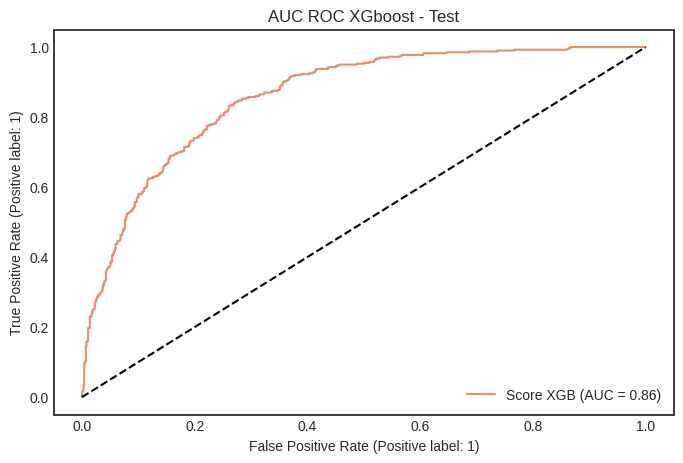

In [19]:
fig, ax = plt.subplots(figsize=(8, 5))

RocCurveDisplay.from_predictions(df_test_score['Churn Value'],df_test_score['score'],ax=ax,name="Score XGB")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('AUC ROC XGboost - Test')
plt.style.use('seaborn-white')

plt.show()

#### Feature Importance

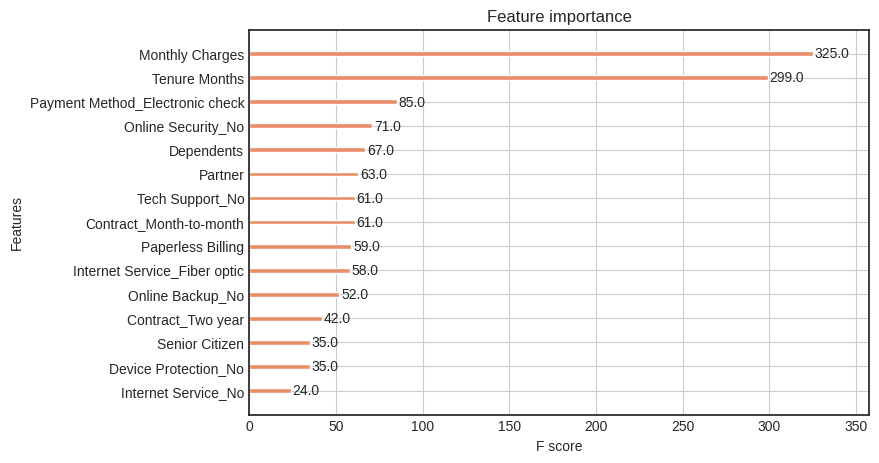

In [20]:
plt.rcParams["figure.figsize"] = (8,5)
plot_importance(xgboost_opt,
                    max_num_features=40)
plt.show()

In [21]:
explainer = shap.TreeExplainer(xgboost_opt)
shap_values = explainer.shap_values(X_test)

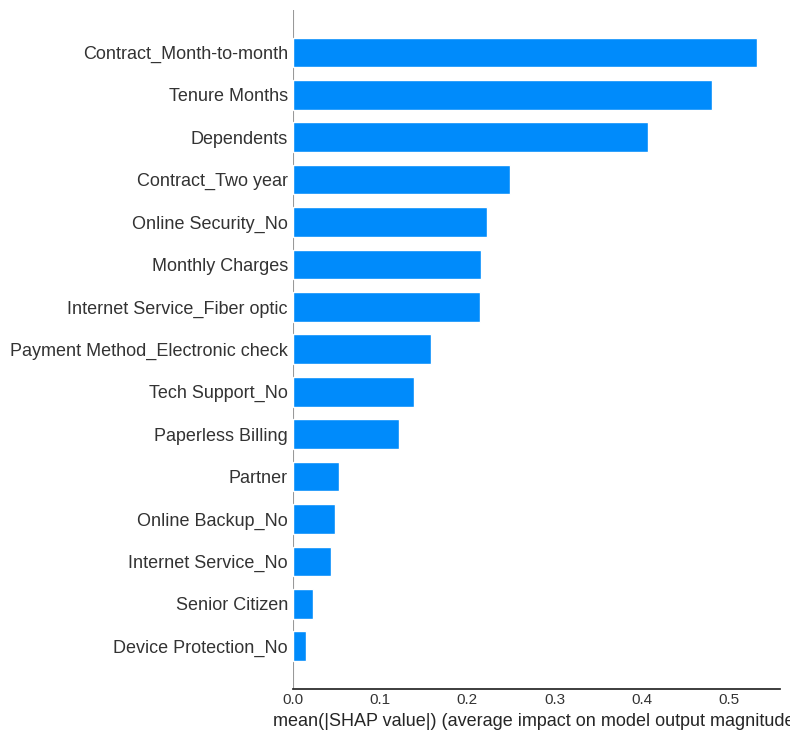

In [22]:
shap.summary_plot(shap_values, X_test, plot_type = 'bar')

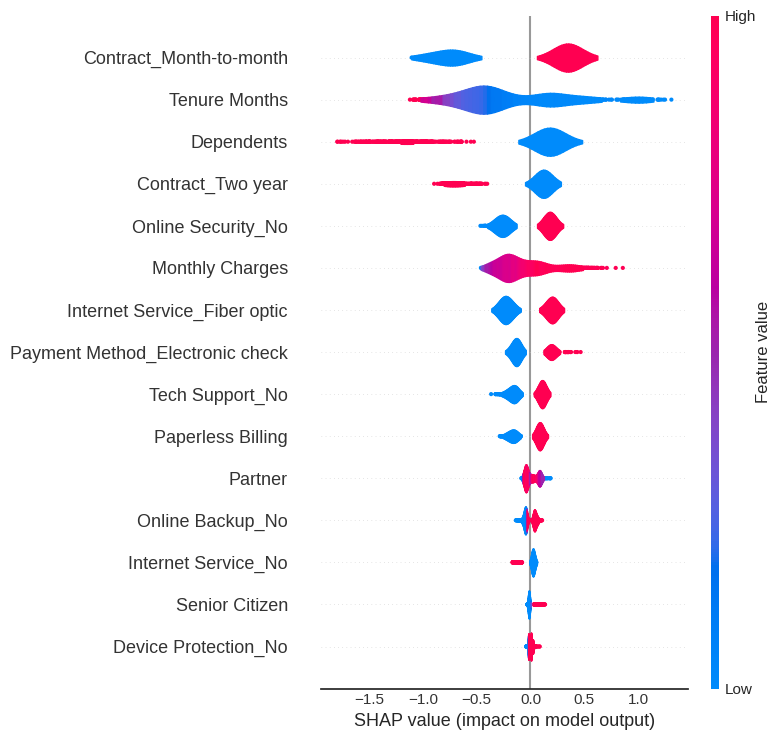

In [23]:
shap.summary_plot(shap_values, X_test, plot_type="violin")


A la hora de la presentación de resultados, también puede ser útil proponer segmentos

In [24]:
df_test_score_eng['Churn_CAT'] = np.where(df_test_score_eng['score'] >= 0.80, 'ALTO',
                                      np.where(df_test_score_eng['score'] >= 0.50, 'MEDIO',
                                      'BAJO'))

In [36]:
df_test_score_eng['tenure_bin'] = pd.qcut(df_test_score_eng['Tenure Months']
                                        , q=3, labels=False, duplicates='drop')\
                                        .astype('str')+"_"+pd.qcut(df_test_score_eng['Tenure Months']
                                        ,q=3, duplicates='drop').astype('str')

<Figure size 700x500 with 0 Axes>

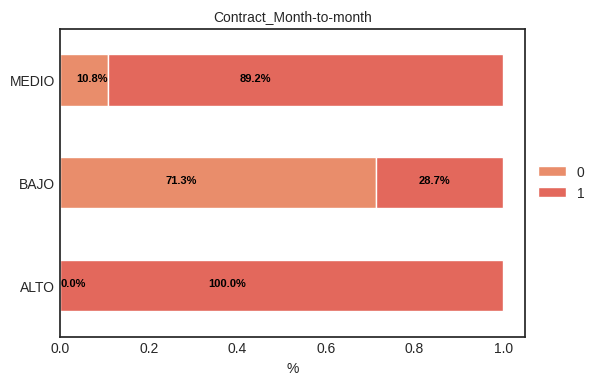

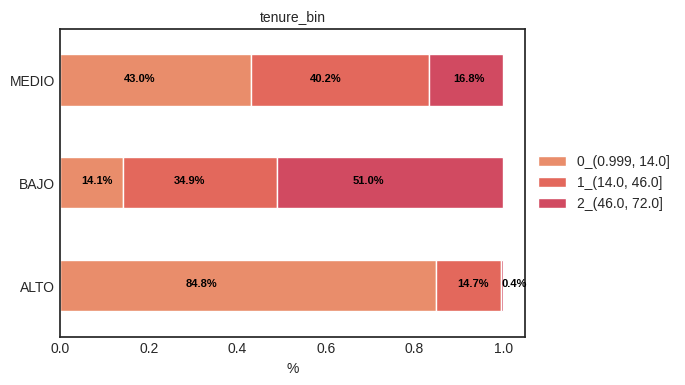

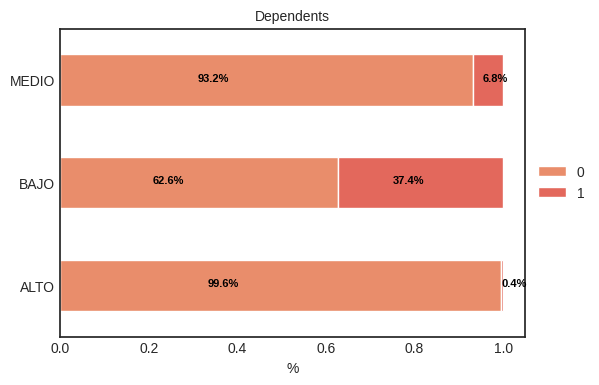

In [43]:
## Exploración visual

most_important_bars = ['Contract_Month-to-month', 'tenure_bin', 'Dependents']

# Plot categorical features
plt.figure(figsize=(7,5))
for i, var_name in enumerate(most_important_bars):
    cross_tab_prop = pd.crosstab(index=df_test_score_eng['Churn_CAT'],
    columns=df_test_score_eng[var_name],
    normalize="index")
    cross_tab_prop.sort_index().plot(kind='barh',
                        stacked=True,
                        #colormap='Greens',
                        figsize=(6, 4))

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylabel('')
    plt.xlabel("%")
    plt.title(label=var_name,
              fontsize=10)

    for n, x in enumerate([*cross_tab_prop.sort_index().index.values]):
        for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                              cross_tab_prop.loc[x].cumsum()):

            plt.text(x=(y_loc - proportion) + (proportion / 3),
                    y=n - 0.01,
                    s=f'{np.round(proportion * 100, 1)}%',
                    color="black",
                    fontsize=8,
                    fontweight="bold")

    plt.show()

In [51]:
# Export
shap_values = explainer.shap_values(X_train)
feature_importance_shap = pd.DataFrame(list(zip(X_train.columns,
                                                 np.abs(shap_values).mean(0))),
                                        columns=['feature_name', 'feature_importance_vals_shap'])

In [52]:
feature_importance_shap.head()

,feature_name,feature_importance_vals_shap
0,Dependents,0.41
1,Internet Service_Fiber optic,0.21
2,Monthly Charges,0.22
3,Contract_Two year,0.26
4,Contract_Month-to-month,0.55


In [53]:
from sklearn.pipeline import Pipeline
import pickle

'''
pipe_final = Pipeline(steps=[('features_preprocesing', features_encoder),
                        ('lgbm_clf', lgbm_clf),
                       ])
'''

pipe_final = Pipeline(steps=[('xgb_clf', xgboost_opt)
                       ])

# Guardamos pipelina final
with open('pickle_modelo_final_xgb.pkl', 'wb') as fp:
    pickle.dump(pipe_final, fp)

In [59]:
print(round(roc_auc_score(Y_test, preds_xgboost_test[:,1]) ,4))
print(round(roc_auc_score(Y_test, pipe_final.predict_proba(X_test)[:,1]) ,4))

0.8606
0.8606
